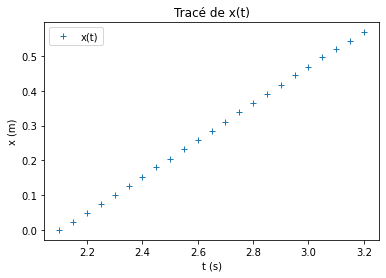

In [25]:
import pandas
import numpy as np
import matplotlib.pylab as plt
import datetime

data = pandas.read_csv("parabole.csv").to_numpy()
#print(data)

t = data[:, 0]
x = data[:, 1]
y = data[:, 2]


plt.plot(t, x, label="x(t)", marker="+", linestyle="none")
#plt.plot(t, y, label="y(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.title("Tracé de x(t)")

plt.savefig(f'figures/x(t){str(datetime.datetime.now())}.png', dpi=300, format='png', transparent=True)


In [1]:
from scipy.optimize import curve_fit


def quad_model(x, a, b, c):
    return a*x**2 + b*x + c

# standard error is set to 1 in this example
sig = np.ones((len(x)))

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=quad_model, xdata=t, ydata=y, sigma=sig)

[a, b, c] = popt

print(a, b, c)

NameError: name 'np' is not defined

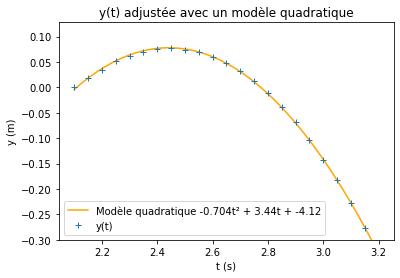

In [52]:

t_model = np.linspace(min(t), max(t), 1000)
y_model = quad_model(t_model, a, b, c)

plt.plot(t_model, y_model, label=f"Modèle quadratique {a:.3}t² + {b:.3}t + {c:.3}", color='orange')
plt.plot(t, y, label="y(t)", marker="+", linestyle="none", color='tab:blue')
plt.title("y(t) adjustée avec un modèle quadratique")

#plt.plot(t, y, label="y(t)")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.ylim(-0.3, max(y_model)+0.05)
plt.legend()



plt.savefig(f'figures/y(t){str(datetime.datetime.now())}.png', dpi=300, format='png', transparent=True)

[0.48 0.5  0.51 0.51 0.51 0.51 0.54 0.53 0.52 0.53 0.53 0.53 0.53 0.54
 0.53 0.52 0.53 0.52 0.52 0.51 0.48 0.48 0.48]


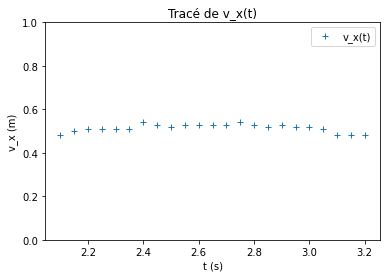

In [50]:


v_x = np.zeros(len(x))
v_y = np.zeros(len(y))
for i in range(len(x)):
    if i == 0:
        v_x[i] = (x[i] - x[i+1])/(t[i] - t[i+1])
        v_y[i] = (y[i] - y[i+1])/(t[i] - t[i+1])
        continue
    elif i == len(x)-1:
        v_x[i] = (x[i] - x[i-1])/(t[i] - t[i-1])
        v_y[i] = (y[i] - y[i-1])/(t[i] - t[i-1])
        continue
    v_x[i] = (x[i-1] - x[i+1])/(t[i-1] - t[i+1])
    v_y[i] = (y[i-1] - y[i+1])/(t[i-1] - t[i+1])

print(v_x)
plt.plot(t, v_x, color='tab:blue', linestyle='none', marker='+', label="v_x(t)")   
plt.ylim(0, 1) 

plt.xlabel("t (s)")
plt.ylabel("v_x (m)")
plt.legend()
plt.title("Tracé de v_x(t)")

plt.savefig(f'figures/v_x(t){str(datetime.datetime.now())}.png', dpi=300, format='png', transparent=True)


    


-1.3628458497989542 3.3137154150107073


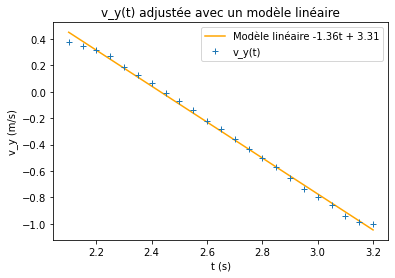

In [64]:
def lin_model(x, m, c):
    return m*x + c

# standard error is set to 1 in this example
sig = np.ones((len(x)))

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=lin_model, xdata=t, ydata=v_y, sigma=sig)

[m, c] = popt

print(m, c)

t_model = np.linspace(min(t), max(t), 1000)
v_model = lin_model(t_model, m, c)


plt.plot(t_model, v_model, label=f"Modèle linéaire {m:.3}t + {c:.3}", color='orange')
plt.plot(t, v_y, color='tab:blue', linestyle='none', marker='+', label="v_y(t)") 
plt.title("v_y(t) adjustée avec un modèle linéaire")

#plt.plot(t, y, label="y(t)")
plt.xlabel("t (s)")
plt.ylabel("v_y (m/s)")  
plt.legend()
plt.savefig(f'figures/v_y(t){str(datetime.datetime.now())}.png', dpi=300, format='png', transparent=True)

In [65]:
def finite_diff_grad(X, T):
    V = np.zeros(len(X))
    for i in range(len(X)):
        if i == 0:
            V[i] = (X[i] - X[i+1])/(T[i] - T[i+1])
            continue
        elif i == len(X)-1:
            V[i] = (X[i] - X[i-1])/(T[i] - T[i-1])
            continue
        V[i] = (X[i-1] - X[i+1])/(T[i-1] - T[i+1])
    return V


In [69]:
a_y = finite_diff_grad(v_y, t)
print(sum(a_y)/len(a_y))
print(np.mean(a_y))

-1.217391304347821
-1.217391304347821


In [79]:
theta = np.arcsin(56/616)
print(np.rad2deg(theta))
print(9.81*np.sin(theta))
print(9.81*np.cos(theta))
print(9.81*np.sin(theta)/np.cos(theta))

print(np.cos(theta)*9.81*(56/616))

5.215908570454124
0.8918181818181818
9.769378707501236
0.8955263815209465
0.888125337045567
